In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [5]:
all_site_daily_mean = all_site_daily_mean.to_frame('PM25')

In [6]:
all_site_daily_mean['dow'] = all_site_daily_mean.index.dayofweek

In [7]:
all_site_daily_mean['dow'] = all_site_daily_mean['dow'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [8]:
cat_dtype = pd.CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

In [9]:
all_site_daily_mean['dow'] = all_site_daily_mean['dow'].astype(cat_dtype)

In [10]:
all_site_daily_mean.index.min(), all_site_daily_mean.index.max()

(Timestamp('2019-03-07 00:00:00'), Timestamp('2019-08-23 00:00:00'))

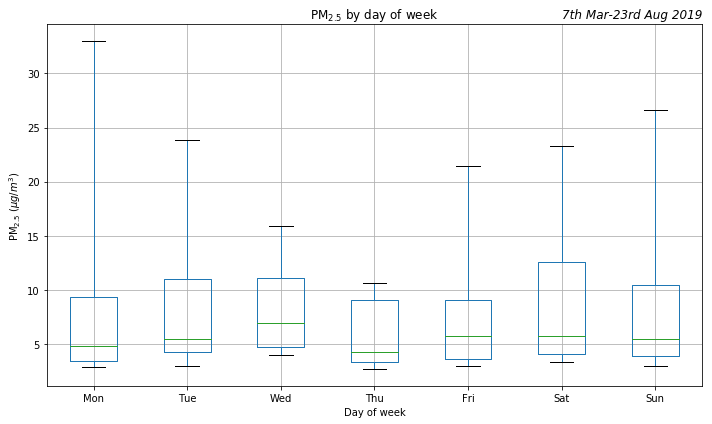

In [11]:
all_site_daily_mean.boxplot(by='dow', figsize=(10, 6), showfliers=False, whis=[5, 95])
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Day of week')
plt.title(r'$\mathrm{PM}_{2.5}$ by day of week')
plt.suptitle('')
plt.tight_layout()
plt.gca().set_title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.savefig('graphs/DayOfWeek_Boxplot.png', dpi=300)

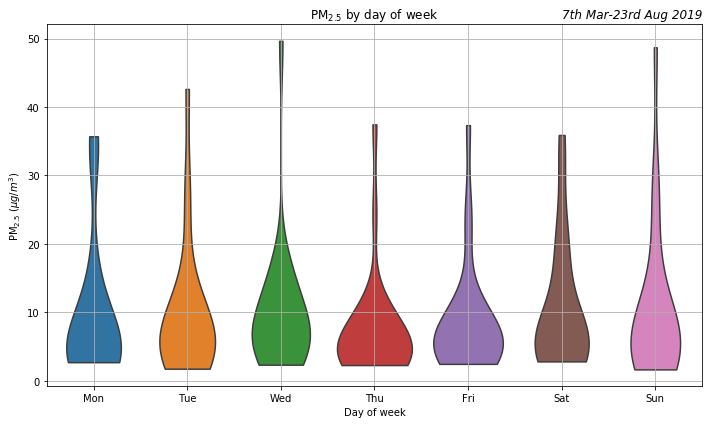

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='dow', y='PM25', data=all_site_daily_mean, cut=0, inner=None)
plt.grid()
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Day of week')
plt.title('$\mathrm{PM}_{2.5}$ by day of week')
plt.suptitle('')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/DayOfWeek_ViolinPlot.png', dpi=300)

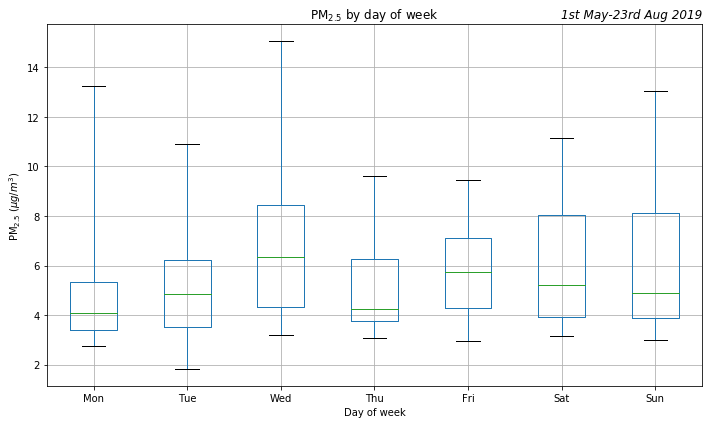

In [13]:
all_site_daily_mean['2019-05-01':].boxplot(by='dow', figsize=(10, 6), showfliers=False, whis=[5, 95])
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Day of week')
plt.title('$\mathrm{PM}_{2.5}$ by day of week')
plt.suptitle('')
plt.gca().set_title('1st May-23rd Aug 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/DayOfWeek_Boxplot_MayOnwards.png', dpi=300)